# Exploratory Analysis (EDA)

The primary aim of this module is to analyze the distribution of the input variables, identify and remove highly skewed variables, standardize variables to a common scale, and detect and remove outliers.

## Configure Environment 

### Import libraries

In [1]:
import os
from pathlib import Path
from math import ceil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Utility functions

In [2]:
def make_mydir(dirname: str) -> Path:
    """
    Creates a directory, including parent directories if they do not exist.

    :param dirname: The path of the directory to create.
    :return: Path object representing the created directory.
    """
    path = Path(dirname)
    # Create the directory, along with any necessary parent directories
    path.mkdir(parents=True, exist_ok=True)
    return path

## Process 

### Read Data

In [3]:
# Define the path to the processed data file and columns to exclude
input_file_path = "../resources/data/input/processed_input_data.csv"
exclude_from_in_vars_cols = ['hhid', 'hv025']

# Load the data into a DataFrame
in_df = pd.read_csv(input_file_path)

# Display the first few rows of the DataFrame and its size
display(in_df.head())
print(f'Size of DataFrame: {in_df.shape}')


,hhid,hv009,hv025,hv204,hv206,hv207,hv208,hv209,hv210,hv211,...,age_21_30,age_31_40,age_41_50,age_51_60,age_60+,no_education,primary,secondary,higher,member_attend_school_count
0,10706 5,5,1,996,1,1,1,1,0,0,...,0,0,2,0,0,1,0,3,1,2
1,10706 15,3,1,996,1,0,1,1,0,0,...,2,0,0,1,0,1,0,2,0,0
2,10706 24,8,1,996,1,0,1,1,0,0,...,2,2,0,1,0,3,1,4,0,0
3,10706 34,4,1,996,1,0,1,1,0,0,...,0,0,1,1,0,0,1,3,0,2
4,10706 53,5,1,996,1,0,1,1,0,0,...,1,1,1,0,1,1,1,3,0,1


Size of DataFrame: (26807, 130)


### Distribution Analysis

#### Discrete Distribution: Multinomial 

In [4]:
# List of columns with multinomial distribution
print('List of columns with multinomial distribution:')
multinominal_cols = [] 

for col in in_df.columns:
    if col not in exclude_from_in_vars_cols:
        # Count the number of unique levels in the column
        no_levels = len(pd.unique(in_df[col]))
        if no_levels > 2:
            print(f"Column: {col}, No. of levels: {no_levels}")
            multinominal_cols.append(col)

# Display results
print(f"Total number of multinomial columns: {len(multinominal_cols)}")

List of columns with multinomial distribution:
Column: hv009, No. of levels: 26
Column: hv204, No. of levels: 29
Column: hv216, No. of levels: 10
Column: hv220, No. of levels: 80
Column: hv246a, No. of levels: 15
Column: hv246b, No. of levels: 11
Column: hv246c, No. of levels: 10
Column: hv246d, No. of levels: 18
Column: hv246e, No. of levels: 19
Column: hv246f, No. of levels: 49
Column: hv246g, No. of levels: 30
Column: hv246h, No. of levels: 38
Column: hv246i, No. of levels: 31
Column: hv246j, No. of levels: 9
Column: hv246k, No. of levels: 18
Column: sh124g, No. of levels: 12
Column: sh124h, No. of levels: 13
Column: male_count, No. of levels: 17
Column: female_count, No. of levels: 16
Column: age_00_10, No. of levels: 14
Column: age_11_20, No. of levels: 10
Column: age_21_30, No. of levels: 9
Column: age_31_40, No. of levels: 8
Column: age_41_50, No. of levels: 6
Column: age_51_60, No. of levels: 5
Column: age_60+, No. of levels: 5
Column: no_education, No. of levels: 17
Column: pr

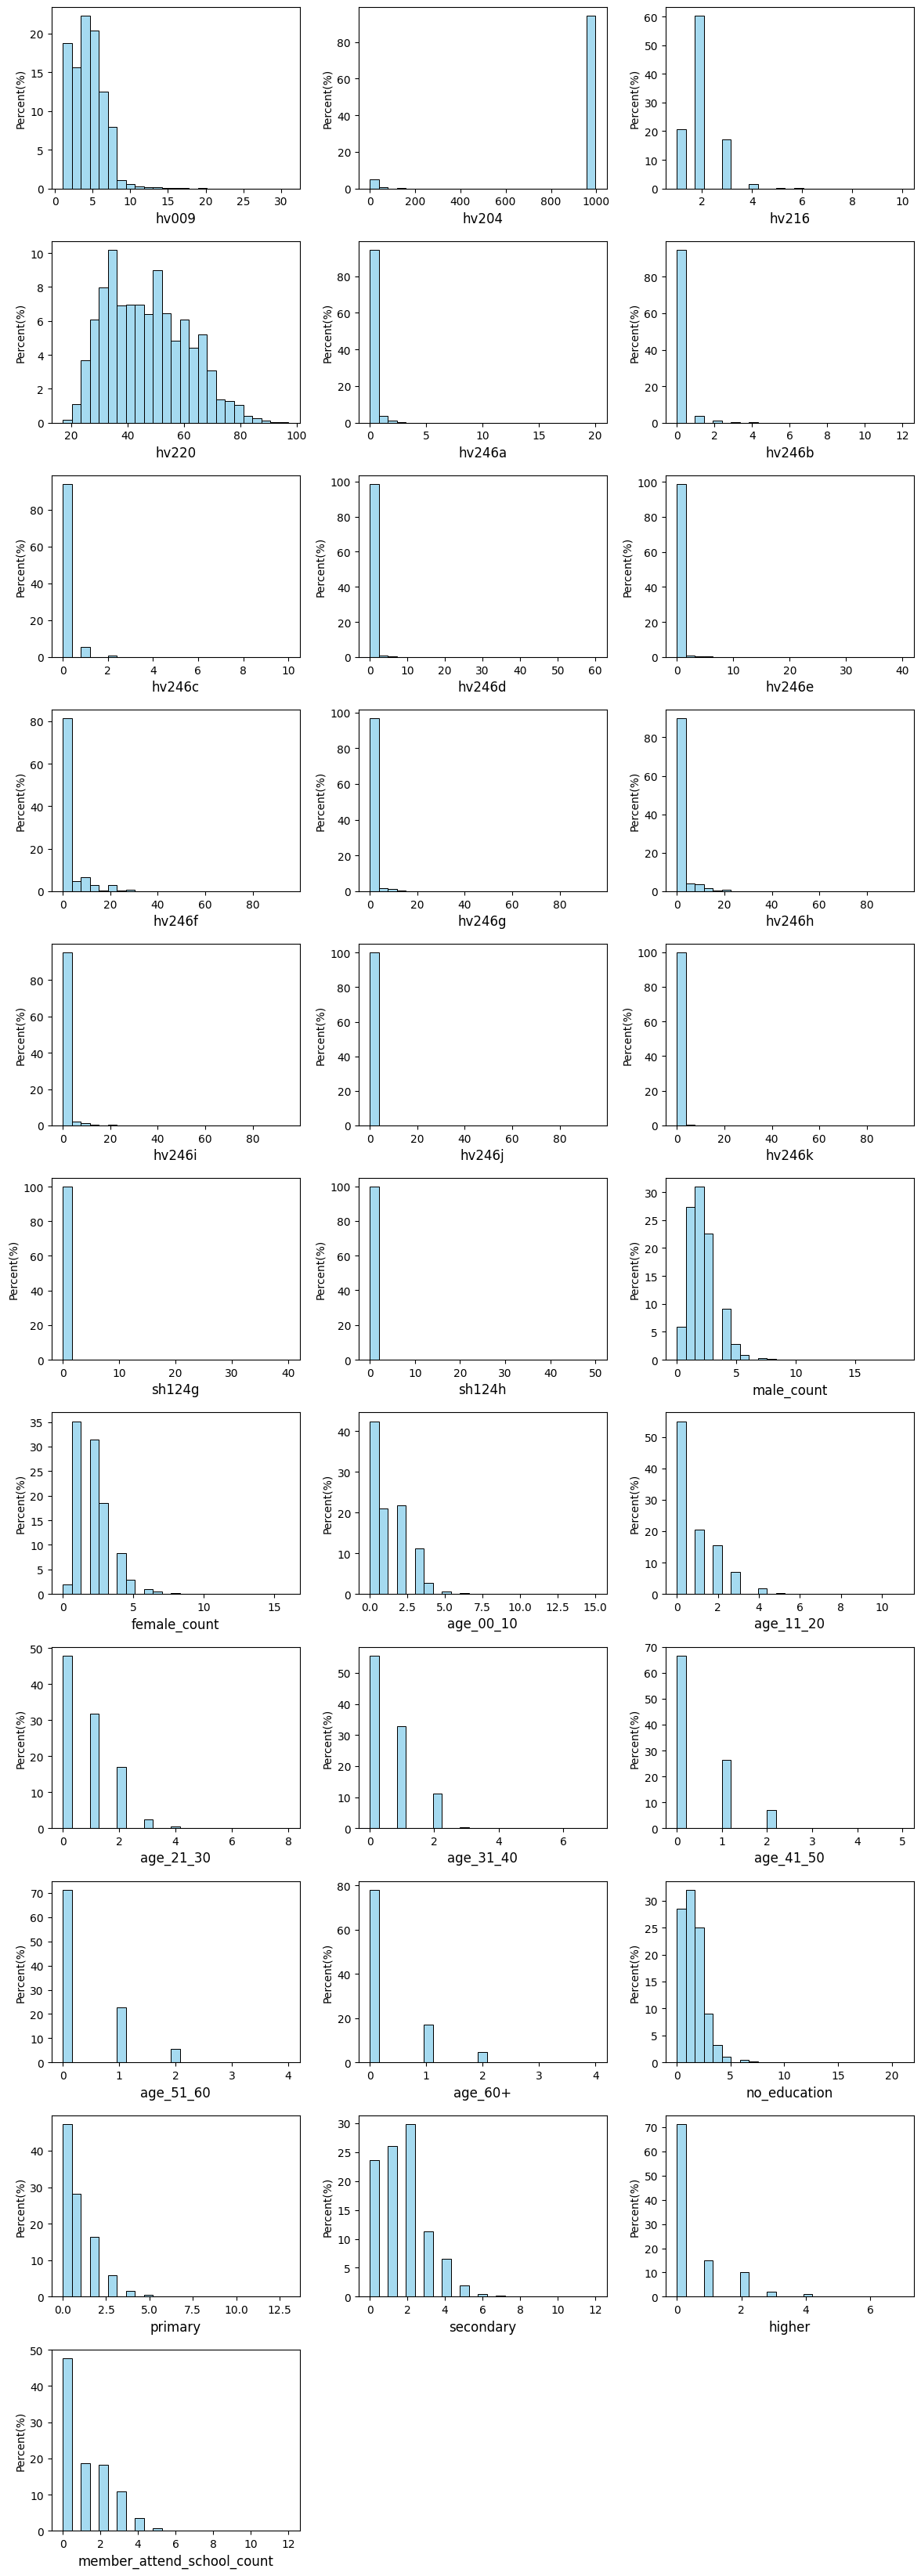

Highly skewed multinominal variables: ['hv204', 'hv246a', 'hv246b', 'hv246c', 'hv246d', 'hv246e', 'hv246g', 'hv246i', 'hv246j', 'hv246k', 'sh124g', 'sh124h']


In [5]:
# Inspect histograms for highly skewed variables

# Define the number of rows and columns for subplots
n_rows, n_cols = ceil(len(multinominal_cols) / 3), 3

# Create subplots with appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List to store highly skewed variables
multi_highly_skewed_vars = []

# Loop over multinomial columns to plot histograms and detect skewness
for i, col in enumerate(multinominal_cols):
    sns.histplot(in_df[col], ax=axes[i], kde=False, stat='percent', bins=25, color='skyblue')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percent(%)', fontsize=10)
    
    # Identify highly skewed variables (over 90% frequency for a single value)
    value_counts = in_df[col].value_counts()
    if (max(value_counts) / sum(value_counts)) * 100 >= 90:
        multi_highly_skewed_vars.append(col)

# Hide any remaining unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Print results
print(f"Highly skewed multinominal variables: {multi_highly_skewed_vars}")

In [6]:
print(f'Number of highly skewed multinomial variables to be removed from analysis: {len(multi_highly_skewed_vars)}')
print(f'sample of variables: {multi_highly_skewed_vars[:5]}')

Number of highly skewed multinomial variables to be removed from analysis: 12
sample of variables: ['hv204', 'hv246a', 'hv246b', 'hv246c', 'hv246d']


#### Discrete Distribution: Binomial  

In [7]:
print('List of columns with binomial distribution:')
binomial_cols = [] 

for col in in_df.columns:
    if col not in exclude_from_in_vars_cols:
        no_levels = len(pd.unique(in_df[col]))
        if no_levels == 2:
            print(f"Column: {col}, No. of levels: {no_levels}")
            binomial_cols.append(col)

print(f"Total number of binomial columns: {len(binomial_cols)}")

List of columns with binomial distribution:
Column: hv206, No. of levels: 2
Column: hv207, No. of levels: 2
Column: hv208, No. of levels: 2
Column: hv209, No. of levels: 2
Column: hv210, No. of levels: 2
Column: hv211, No. of levels: 2
Column: hv212, No. of levels: 2
Column: hv219, No. of levels: 2
Column: hv221, No. of levels: 2
Column: hv225, No. of levels: 2
Column: hv230b, No. of levels: 2
Column: hv237, No. of levels: 2
Column: hv237a, No. of levels: 2
Column: hv237b, No. of levels: 2
Column: hv237c, No. of levels: 2
Column: hv237d, No. of levels: 2
Column: hv237e, No. of levels: 2
Column: hv237f, No. of levels: 2
Column: hv237x, No. of levels: 2
Column: hv243a, No. of levels: 2
Column: hv243b, No. of levels: 2
Column: hv243c, No. of levels: 2
Column: hv244, No. of levels: 2
Column: hv246, No. of levels: 2
Column: hv247, No. of levels: 2
Column: sh111c, No. of levels: 2
Column: sh111d, No. of levels: 2
Column: sh111e, No. of levels: 2
Column: sh111f, No. of levels: 2
Column: sh111

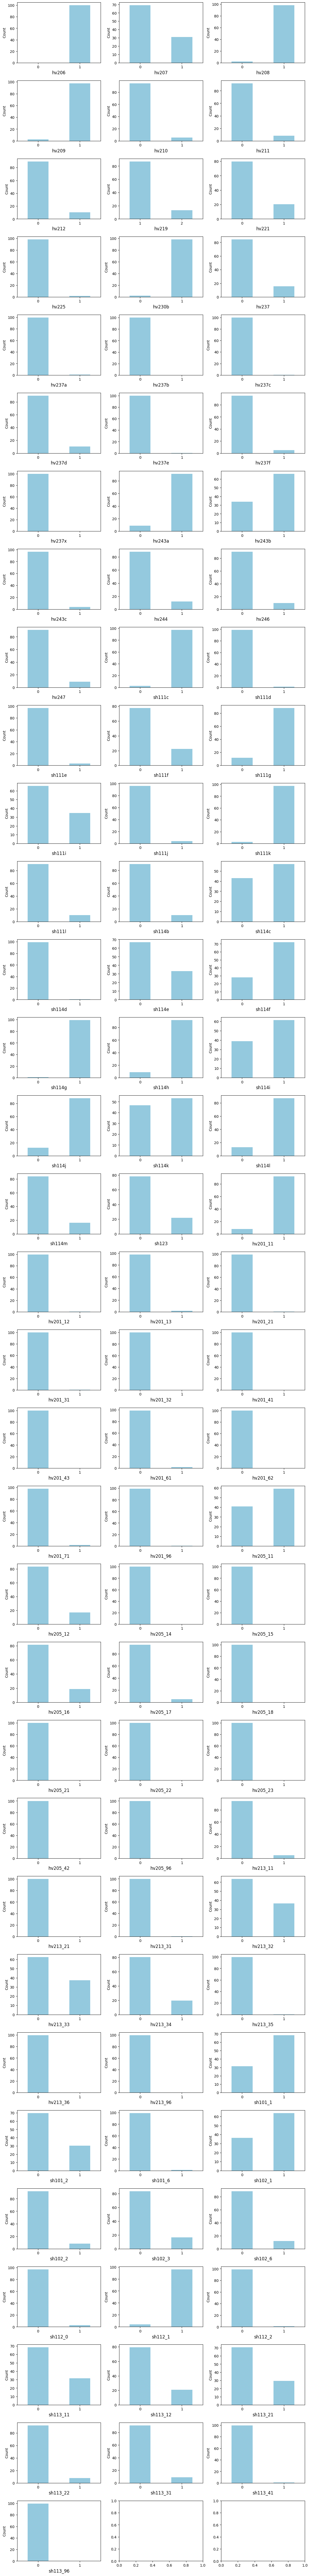

In [8]:
# Inspect histograms for highly skewed variables

# Set the number of rows and columns for subplots based on the number of binomial columns
n_rows, n_cols = int(ceil(len(binomial_cols)/3)), 3

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Initialize a list to track highly skewed variables
bi_highly_skewed_vars = []

# Loop through each binomial column to create histograms and identify skewed variables
for i, col in enumerate(binomial_cols):
    # Plot the distribution of the current column
    sns.countplot(in_df, x=col, ax=axes[i], stat='percent', width=0.5, color='skyblue')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=10)

    # Check if the column is highly skewed (>90% in one category)
    value_counts = in_df[col].value_counts()
    if (max(value_counts) / sum(value_counts)) * 100 >= 90:
        bi_highly_skewed_vars.append(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [9]:
print(f'Number of highly skewed binomial variables to be removed from analysis: {len(bi_highly_skewed_vars)}')
print(f'sample variables: {bi_highly_skewed_vars[:5]}')

Number of highly skewed binomial variables to be removed from analysis: 62
sample variables: ['hv206', 'hv208', 'hv209', 'hv210', 'hv211']


In [10]:
# Select columns that are not identified as highly skewed (both multinominal and binomial)
selected_columns = [col for col in in_df.columns if col not in multi_highly_skewed_vars \
                                                and col not in bi_highly_skewed_vars]

# Update the DataFrame with the selected columns
in_df = in_df[selected_columns]

# Display the first few rows of the updated DataFrame and its size
display(in_df.head())
print(f'Size of DataFrame: {in_df.shape}')

,hhid,hv009,hv025,hv207,hv212,hv216,hv219,hv220,hv221,hv237,...,age_21_30,age_31_40,age_41_50,age_51_60,age_60+,no_education,primary,secondary,higher,member_attend_school_count
0,10706 5,5,1,1,0,3,1,46,1,1,...,0,0,2,0,0,1,0,3,1,2
1,10706 15,3,1,0,0,3,2,51,0,0,...,2,0,0,1,0,1,0,2,0,0
2,10706 24,8,1,0,0,2,2,58,0,0,...,2,2,0,1,0,3,1,4,0,0
3,10706 34,4,1,0,1,2,1,51,1,0,...,0,0,1,1,0,0,1,3,0,2
4,10706 53,5,1,0,0,2,2,65,0,1,...,1,1,1,0,1,1,1,3,0,1


Size of DataFrame: (26807, 56)


### Standardization

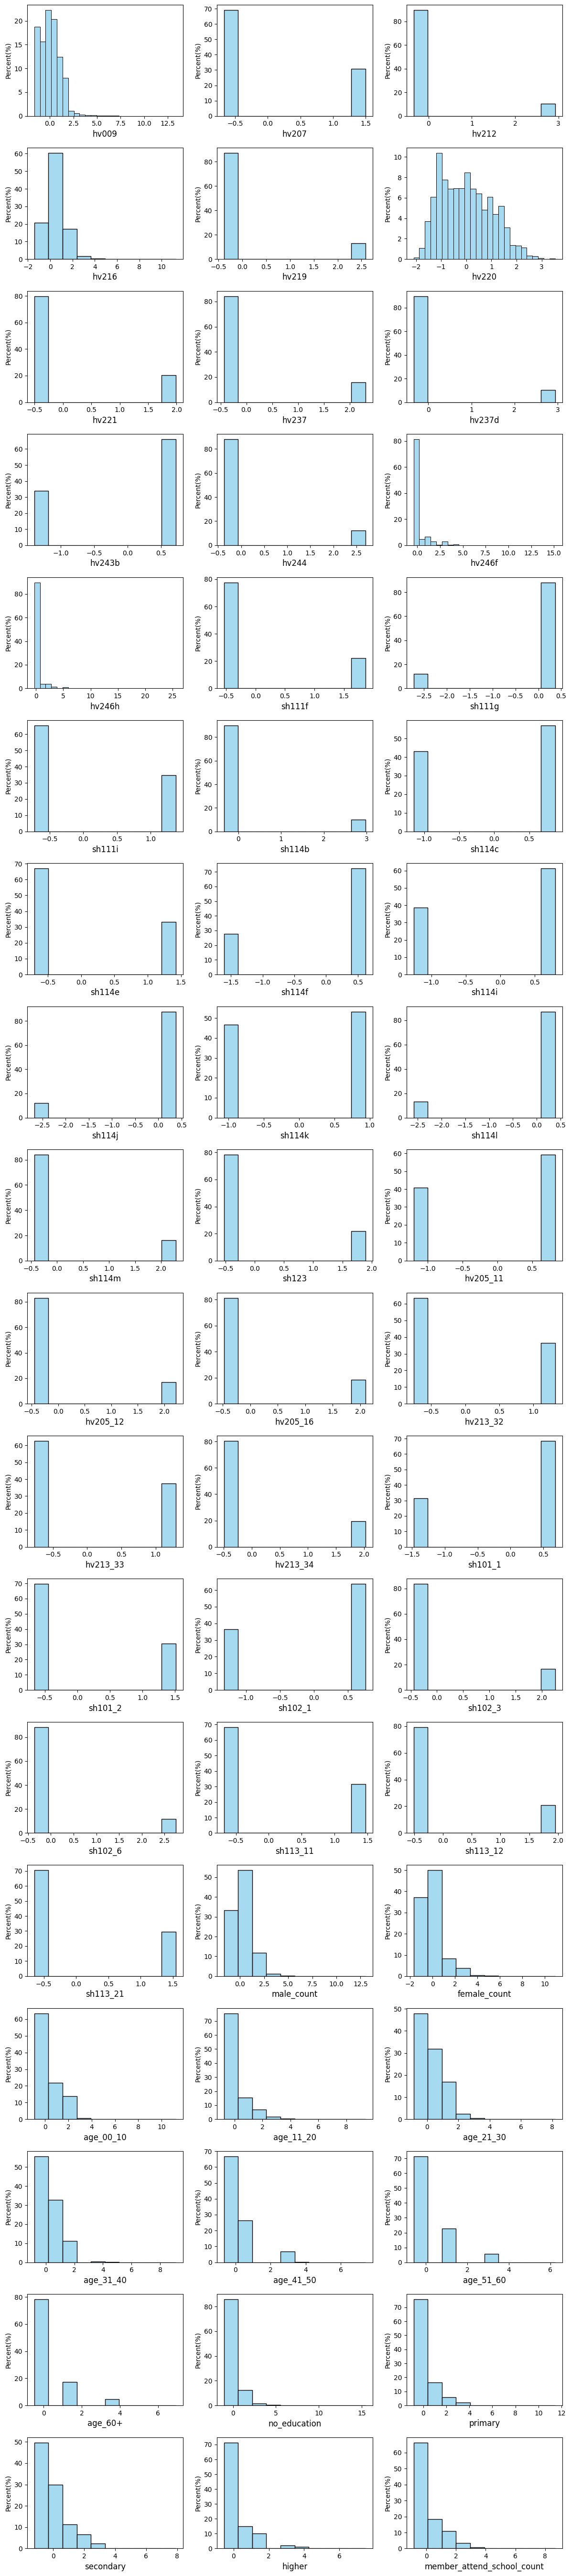

In [11]:
# Inspect histograms standardized variables

# Calculate the number of rows and columns for subplots (3 plots per row)
n_rows, n_cols = int(ceil((len(in_df.columns) - len(exclude_from_in_vars_cols))/3)), 3

# Create a grid of subplots for variable distribution histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))

# Flatten the axes array for easy iteration over multiple variables
axes = axes.flatten()

# List to store variables identified as having outliers
vars_with_outliers = []

# Iterate over the columns of the DataFrame, except excluded columns
i = -1
for col in in_df.columns:
    if col not in exclude_from_in_vars_cols:
        i += 1
        no_levels  = len(pd.unique(in_df[col]))

        # Standardize the column values using Z-score
        in_df[col] = stats.zscore(in_df[col])

        # Identify columns with outliers beyond ±3 standard deviations
        if in_df[col].max() > 3 or in_df[col].min() < -3:
            vars_with_outliers.append(col)

        # Set appropriate number of bins for histograms
        bins = 10 if no_levels <= 25 else 25

        # Plot the histogram of the standardized variable
        sns.histplot(in_df[col], ax=axes[i], kde=False, stat='percent', bins=bins, color='skyblue')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Percent(%)', fontsize=10)
            
# Adjust the layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

In [12]:
print(f'Number of variables with outliers: {len(vars_with_outliers)}')
print(f'Sample of theses variables: {vars_with_outliers[:5]}')

Number of variables with outliers: 19
Sample of theses variables: ['hv009', 'hv216', 'hv220', 'hv246f', 'hv246h']


### Outlier Handling

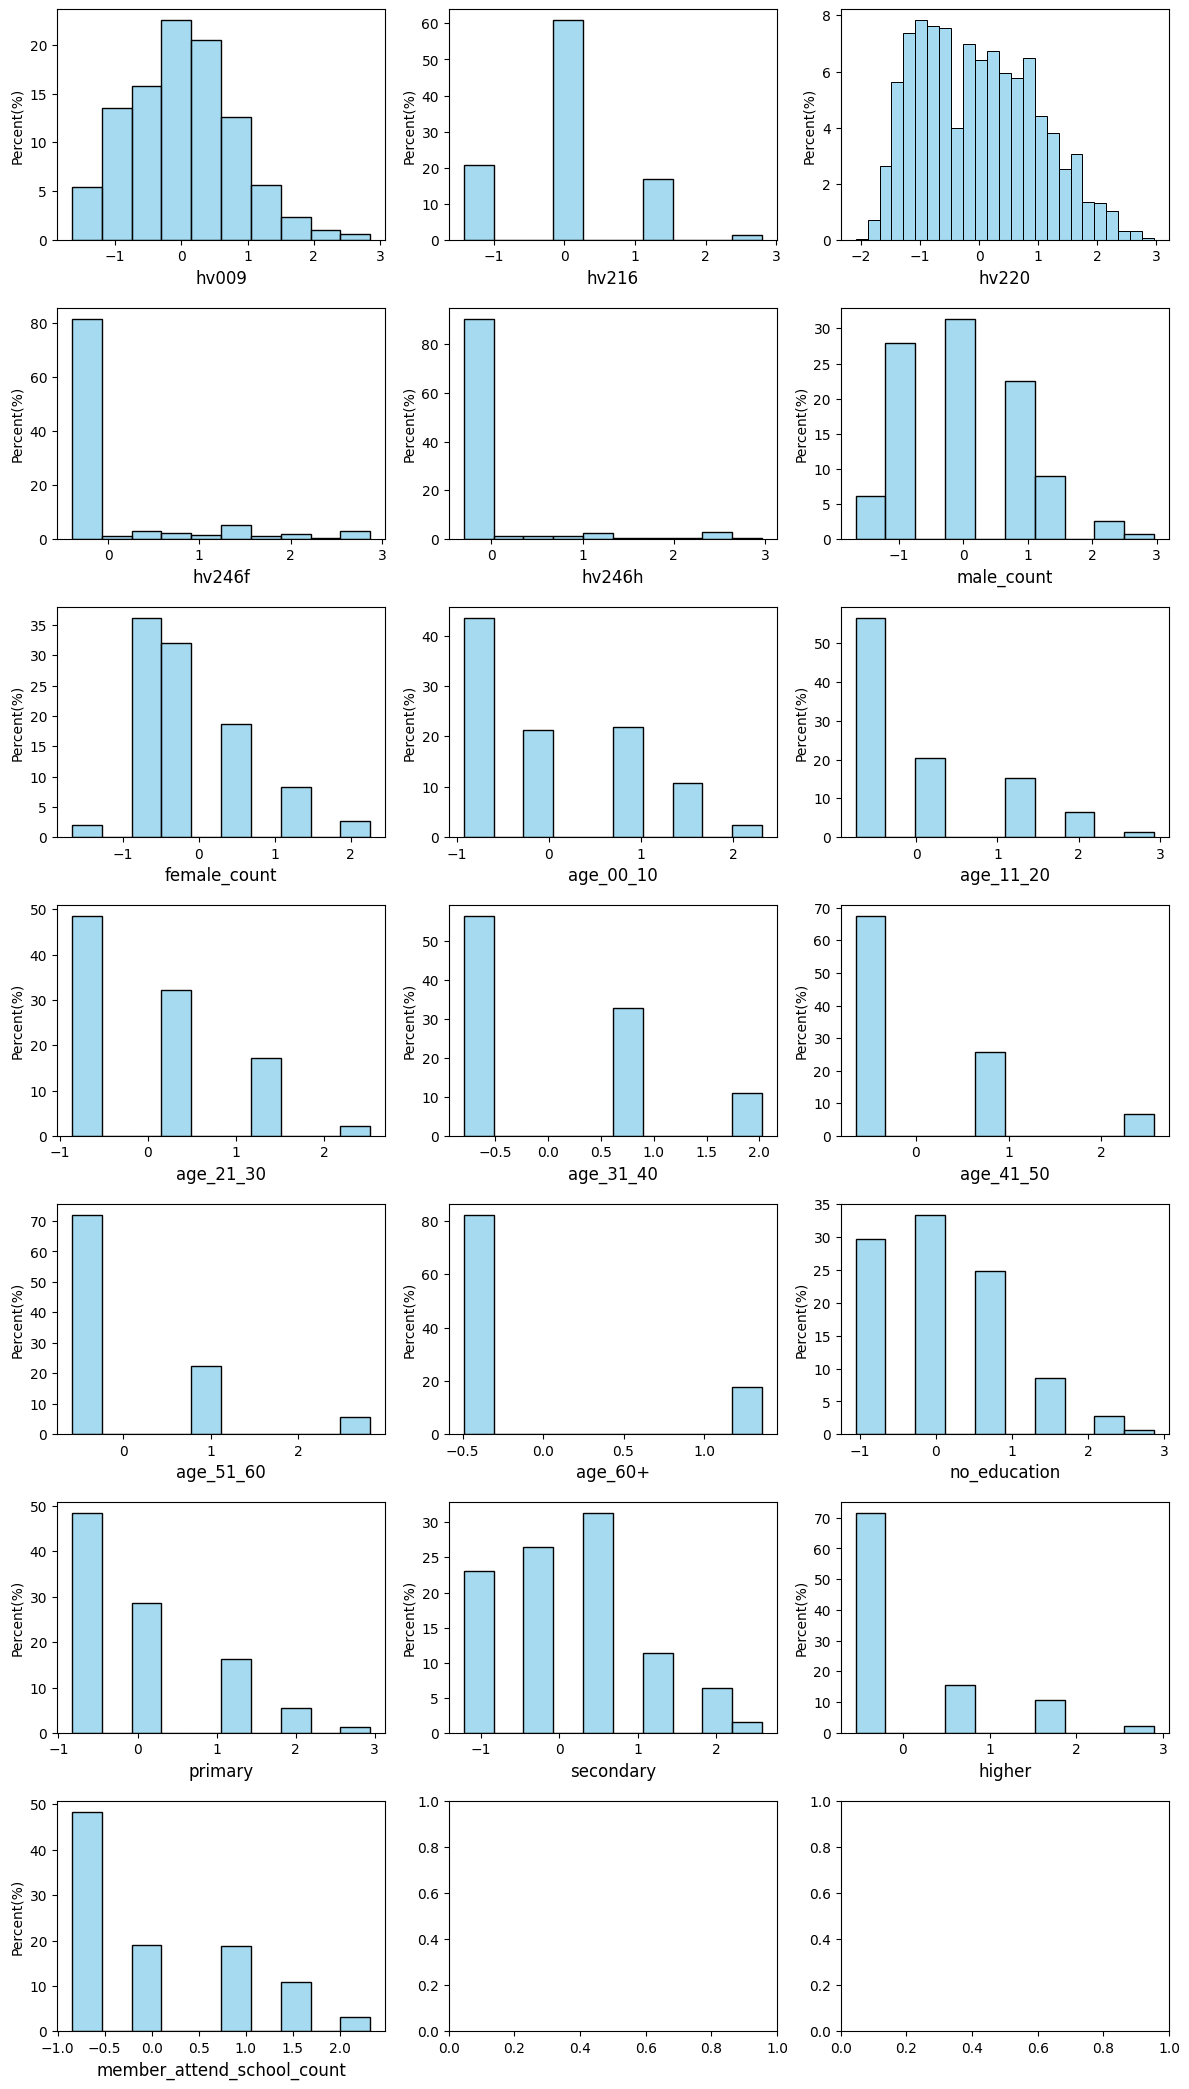

In [13]:
# Inspect histograms standardized variables with removed outliers

# Calculate the number of rows and columns for subplots based on the number of outlier variables (3 per row)
n_rows, n_cols = int(ceil(len(vars_with_outliers)/3)), 3

# Create a grid of subplots for displaying the histograms of variables with outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))

# Flatten the axes array for easy iteration over the variables
axes = axes.flatten()

# Iterate over each variable identified as having outliers
for i, col in enumerate(vars_with_outliers):
    
    # Remove rows with outlier values beyond ±3 standard deviations for the current variable
    in_df = in_df[(in_df[col] <= 3) & (in_df[col] >= -3)]
    
    # Determine the number of unique levels in the current column
    no_levels  = len(pd.unique(in_df[col]))
    
    # Set appropriate number of bins for histograms
    bins = 10 if no_levels <= 25 else 25
    
    # Plot the histogram of the cleaned variable (after removing outliers)
    sns.histplot(in_df[col], ax=axes[i], kde=False, stat='percent', bins=bins, color='skyblue')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percent(%)', fontsize=10)
            
# Adjust the layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

In [14]:
display(in_df.head())
print(f'Size of DataFrame: {in_df.shape}')

,hhid,hv009,hv025,hv207,hv212,hv216,hv219,hv220,hv221,hv237,...,age_21_30,age_31_40,age_41_50,age_51_60,age_60+,no_education,primary,secondary,higher,member_attend_school_count
0,10706 5,0.351393,1,1.494803,-0.342264,1.392528,-0.387135,-0.054182,1.985521,2.306065,...,-0.864431,-0.796786,2.568372,-0.587886,-0.492876,-0.269792,-0.831126,1.066206,0.602973,0.737485
1,10706 15,-0.648267,1,-0.668985,-0.342264,1.392528,2.583079,0.297279,-0.503646,-0.433639,...,1.396440,-0.796786,-0.650438,1.116392,-0.492876,-0.269792,-0.831126,0.305405,-0.542428,-0.848982
2,10706 24,1.850885,1,-0.668985,-0.342264,-0.017303,2.583079,0.789324,-0.503646,-0.433639,...,1.396440,2.026297,-0.650438,1.116392,-0.492876,1.300231,0.112582,1.827008,-0.542428,-0.848982
3,10706 34,-0.148437,1,-0.668985,2.921723,-0.017303,-0.387135,0.297279,1.985521,-0.433639,...,-0.864431,-0.796786,0.958967,1.116392,-0.492876,-1.054803,0.112582,1.066206,-0.542428,0.737485
4,10706 53,0.351393,1,-0.668985,-0.342264,-0.017303,2.583079,1.281368,-0.503646,2.306065,...,0.266005,0.614755,0.958967,-0.587886,1.361254,-0.269792,0.112582,1.066206,-0.542428,-0.055749


Size of DataFrame: (23222, 56)


### Write Data

In [15]:
# Create the directory for output files
output_file_dir = make_mydir("../resources/data/input/")

# Define the path for the analyzed processed input data file
output_file_path = os.path.join(output_file_dir, "standardized_processed_input_data.csv")

# Save the DataFrame to a CSV file without the index
in_df.to_csv(output_file_path, index=False)

# Confirm that the file has been saved successfully
print(f"File saved to: {output_file_path}")

File saved to: ..\resources\data\input\standardized_processed_input_data.csv


# END